In [1]:
import GPy
import pods
data = pods.datasets.oil_100()

In [4]:
Y = data['X']
kernel = GPy.kern.RBF(6, ARD=True) + GPy.kern.Bias(6)

In [5]:
m = GPy.models.GPLVM(Y, 6, kernel=kernel)
m.data_labels = data['Y'].argmax(axis=1)

In [12]:
verbose =1
m.optimize('scg', messages=verbose)

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s01  0001   1.423871e+03           nan 
    00s07  0007   8.740894e+02   1.244991e+05 
    00s10  0010   2.436348e+02   1.327939e+05 
    00s19  0018  -1.267726e+03   3.869696e+05 
    03s20  0462  -2.369647e+03   6.884857e+05 
    12s24  1680  -2.574027e+03   1.487631e+06 
    22s72  2998  -2.678727e+03   1.183092e+06 
Runtime:     22s72
Optimization status: maxiter exceeded



 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


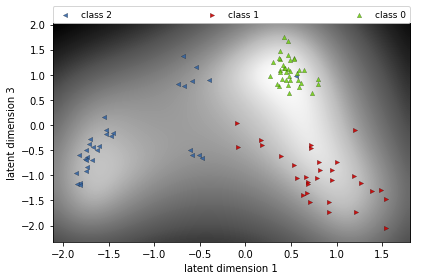

In [13]:
m.plot_latent(labels=m.data_labels)

# Bayesian Guassian Processes


In [19]:
import GPy
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(0)

In [15]:
import pods
data = pods.datasets.oil()

In [49]:
Q=7
num_inducing=40
N=200
max_iters = 1000
verbose=1

k = GPy.kern.RBF(Q, 1., 1. / np.random.uniform(0, 1, (Q,)), ARD=True)  # + GPy.kern.Bias(Q, _np.exp(-2))
Y = data['X'][:N]
m = GPy.models.BayesianGPLVM(Y, Q, kernel=k, num_inducing=num_inducing)
m.data_labels = data['Y'][:N].argmax(axis=1)

In [39]:
 m.optimize('bfgs', messages=verbose, max_iters=max_iters, gtol=.05)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s11  0003   2.709203e+03   3.235027e+06 
    00s17  0005   3.114954e+03   7.329598e+05 
    03s20  0098  -2.883065e+02   2.653606e+03 
    12s33  0355  -6.907175e+02   8.818941e+03 
    13s34  0383  -7.012748e+02   3.214283e+03 
    35s94  1002  -7.960353e+02   9.208871e+02 
Runtime:     35s94
Optimization status: Maximum number of f evaluations reached



[[-0.97010406  0.20510143 -0.47494133  0.94202817  1.53509991 -0.02372941
  -0.9293236 ]]
use left and right mouse buttons to select dimensions


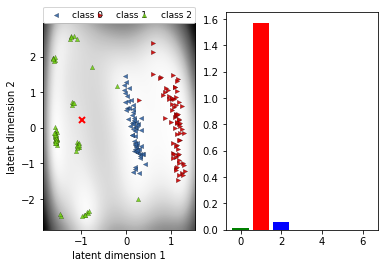

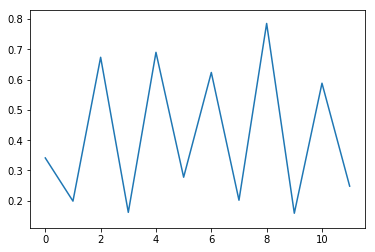

In [45]:
fig, (latent_axes, sense_axes) = plt.subplots(1, 2)
m.plot_latent(ax=latent_axes, labels=m.data_labels)
data_show = GPy.plotting.matplot_dep.visualize.vector_show((m.Y[0, :]))
vm_visualizer = GPy.plotting.matplot_dep.visualize.lvm_dimselect(m.X.mean.values[0:1, :],  # @UnusedVariable
m, data_show, latent_axes=latent_axes, sense_axes=sense_axes, labels=m.data_labels)

In [46]:
m

bayesian_gplvm.,value,constraints,priors
latent space.mean,"(200, 7)",,
latent space.variance,"(200, 7)",+ve,
inducing inputs,"(40, 7)",,
rbf.variance,2.169388492348019,+ve,
rbf.lengthscale,"(7,)",+ve,
Gaussian_noise.variance,0.0008764256549254196,+ve,
